In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [47]:
# Load the data

data = []
labels = []
test = []
test_labels = []

num_of_classes = 11

for i in range(0, num_of_classes):
    path = './train/' + chr(65 + i) + '/'
    files = os.listdir(path)
    print(len(files))
    for file in files:
        

        image = Image.open(path + file)
        image = image.resize((32,32))
        image = np.array(image)
        # split the data into train and test
        tmp = np.random.randint(0, 100)
        if tmp < 20:
            data.append(image)
            labels.append(i)
        else:
            test.append(image)
            test_labels.append(i)

50
53
50
50
51
50
50
50
52
51
51


In [48]:
# Convert the data into numpy array

data = np.array(data)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=8)

y_train = to_categorical(y_train, num_of_classes)
y_test = to_categorical(y_test, num_of_classes)



In [49]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='tanh'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(num_of_classes, activation='softmax'))

In [50]:
# Compile the model and train it
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/20
3/3 [==============================] - 1s 167ms/step - loss: 2.5454 - accuracy: 0.0000e+00 - val_loss: 2.0990 - val_accuracy: 0.2500
Epoch 2/20
3/3 [==============================] - 0s 10ms/step - loss: 2.0854 - accuracy: 0.2381 - val_loss: 1.8542 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 0s 10ms/step - loss: 1.8502 - accuracy: 0.4881 - val_loss: 1.6017 - val_accuracy: 0.5714
Epoch 4/20
3/3 [==============================] - 0s 10ms/step - loss: 1.5642 - accuracy: 0.5833 - val_loss: 1.2765 - val_accuracy: 0.6429
Epoch 5/20
3/3 [==============================] - 0s 9ms/step - loss: 1.2332 - accuracy: 0.6667 - val_loss: 1.0084 - val_accuracy: 0.8571
Epoch 6/20
3/3 [==============================] - 0s 10ms/step - loss: 0.9885 - accuracy: 0.8571 - val_loss: 0.8632 - val_accuracy: 0.8929
Epoch 7/20
3/3 [==============================] - 0s 10ms/step - loss: 0.7793 - accuracy: 0.8690 - val_loss: 0.7228 - val_accuracy: 0.8214
Epoch 8/20
3/3 [=======

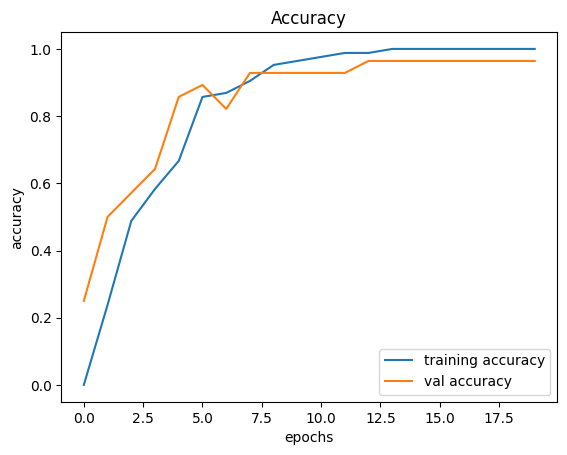

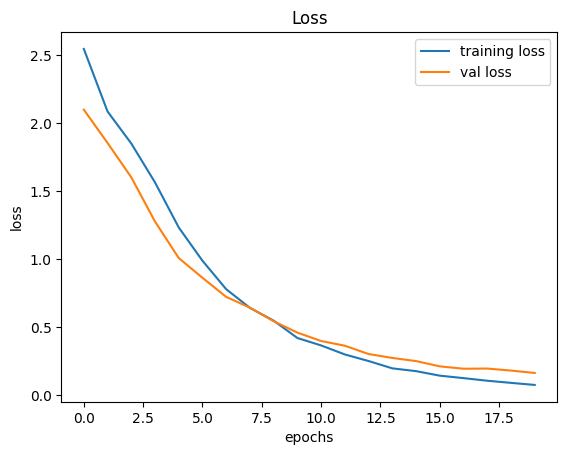

In [51]:
# Plot the accuracy and loss
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [52]:
 
# Testing the model
val = np.array(test)
val_labels = np.array(test_labels)


cnn_pred = model.predict(val)
cnn_pred = np.argmax(cnn_pred, axis=1)

print("CNN accuracy: ", accuracy_score(val_labels, cnn_pred))

14/14 [==============================] - 0s 2ms/step
CNN accuracy:  0.8721973094170403


Text(158.22222222222223, 0.5, 'Truth')

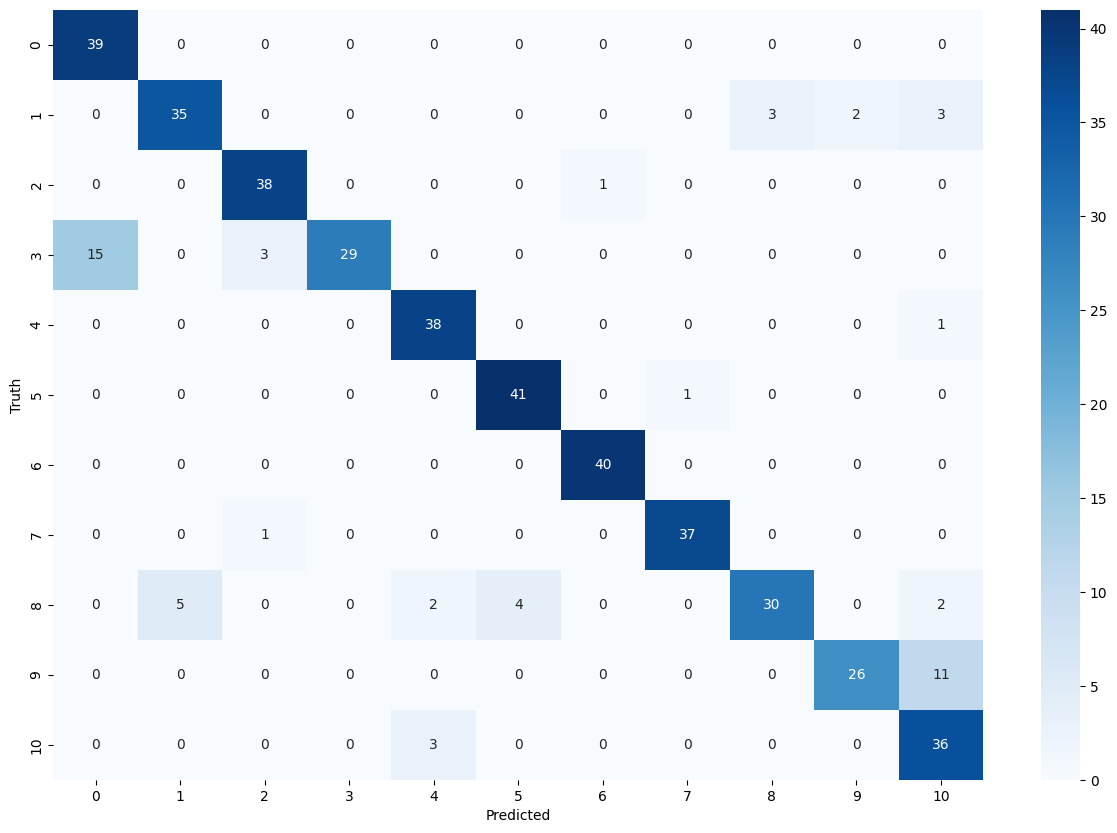

In [53]:
# plot the confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(val_labels, cnn_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')